# Hypothesentests
* H01: Die Mitglieder der AfD twittern genauso viele oder weniger OFFENSE-Tweets als die Mitglieder jeder anderen Partei.
* H02: Die Häufigkeit von OFFENSE-Tweets vor dem Corona Lockdown unterscheidet sich NICHT von der während dem Lockdown.
* H03: Die Häufigkeit von OFFENSE-Tweets nach dem Corona Lockdown unterscheidet sich NICHT von der während dem Lockdown.
* H04: Die Häufigkeit von OFFENSE-Tweets vor dem Corona Lockdown unterscheidet sich NICHT von der nach dem Lockdown.
* H05: Die Mitglieder der AfD rufen im Parlament höchstens genauso oft OFFENSE-Zurufe hinein wie die Mitglieder jeder anderen Partei.
* H06: Die Mitglieder jeder Partei rufen im Plenum höchstens genauso oft OFFENSE-Zurufe hinein wie sie OFFENSE-Tweets absetzen.
* H07: Der Anteil von OFFENSE-Zurufen vor Corona ist genauso groß oder kleiner als währenddessen.


### Load Data -Twitter all

In [1]:
import pandas as pd
import datetime
import pickle, gensim, numpy as np

sent_df_Wien = pickle.load(open('/home/lisa/Darmstadt/Master Arbeit/06_Analyse/sent_df_Wien_final.p', "rb" ))
# Tweets von Johannes Kahrs werdne entfernt um Normalverteilung zu erhalten
sent_df_Wien = sent_df_Wien.loc[sent_df_Wien['user_screen_name'] != 'kahrs'] 

In [2]:
import pandas as pd
time = ['month', 'week', 'date'] # 15 Monate, 67 Wochen, 454 Tage
cat = ['', 'OFFENSE', 'OTHER']
twitter_dic = {}


for c in cat: 
    if c == '':
        sent_df = sent_df_Wien
    else:
        sent_df = sent_df_Wien.loc[sent_df_Wien['predict'] == c]
    for t in time:
        twitter_dic['piv_'+t+c] = pd.pivot_table(sent_df, index = [t], columns = ['user_party'], aggfunc = np.count_nonzero)['full_text'].fillna(0)  

twitter_dic.keys()

for t in time:
    # Normiere OFFENSE Tweets
    twitter_dic['piv_'+t+'_rel'] = (twitter_dic['piv_'+t+'OFFENSE'] / twitter_dic['piv_'+t])*100

## Check for Normality - Twitter all

In [152]:
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(100) + 50

# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))
print('mean=%.3f stdv=%.3f' % (mean(twitter_dic['piv_week']['Union']), std(twitter_dic['piv_week']['Union'])))

mean=50.303 stdv=4.426
mean=582.910 stdv=130.354


In [153]:
durch = []
partei = []
daten = []

for dat in twitter_dic.keys():
    for party in twitter_dic['piv_month'].columns:
        daten.append(dat)
        partei.append(party)
        durch.append('Mean: '+ str(mean(twitter_dic[dat][party]).round(3)) + ' Std:'+str(std(twitter_dic[dat][party]).round(3)))

data_mean_std = pd.DataFrame({'Datensatz': daten, 'Partei': partei, 'Mean': durch})
data_mean_std_piv = pd.pivot_table(data_mean_std, values = 'Mean', index = 'Datensatz', columns = 'Partei', aggfunc = min)

In [213]:
data_mean_std_piv

Partei,AFD,FDP,Gruene,Linke,SPD,Union
Datensatz,,,,,,
piv_date,Mean: 57.896 Std:19.989,Mean: 101.872 Std:44.148,Mean: 85.753 Std:34.219,Mean: 86.916 Std:35.129,Mean: 96.247 Std:37.369,Mean: 86.024 Std:27.308
piv_dateOFFENSE,Mean: 19.463 Std:9.834,Mean: 5.841 Std:4.279,Mean: 5.689 Std:5.885,Mean: 10.449 Std:8.159,Mean: 5.465 Std:7.914,Mean: 5.7 Std:4.045
piv_dateOTHER,Mean: 38.434 Std:13.087,Mean: 96.031 Std:42.428,Mean: 80.064 Std:31.806,Mean: 76.467 Std:30.864,Mean: 90.782 Std:34.269,Mean: 80.324 Std:25.758
piv_date_rel,Mean: 33.208 Std:9.124,Mean: 6.006 Std:4.011,Mean: 6.559 Std:4.463,Mean: 11.998 Std:6.046,Mean: 5.408 Std:4.36,Mean: 6.651 Std:4.328
piv_month,Mean: 1752.333 Std:337.945,Mean: 3083.333 Std:596.482,Mean: 2595.467 Std:530.8,Mean: 2630.667 Std:518.135,Mean: 2913.067 Std:515.877,Mean: 2603.667 Std:350.754
piv_monthOFFENSE,Mean: 589.067 Std:150.705,Mean: 176.8 Std:46.654,Mean: 172.2 Std:74.994,Mean: 316.267 Std:103.085,Mean: 165.4 Std:95.605,Mean: 172.533 Std:42.44
piv_monthOTHER,Mean: 1163.267 Std:216.111,Mean: 2906.533 Std:569.163,Mean: 2423.267 Std:508.037,Mean: 2314.4 Std:474.661,Mean: 2747.667 Std:479.05,Mean: 2431.133 Std:327.087
piv_month_rel,Mean: 33.434 Std:3.974,Mean: 5.769 Std:1.158,Mean: 6.653 Std:2.543,Mean: 12.086 Std:3.008,Mean: 5.586 Std:2.61,Mean: 6.614 Std:1.361
piv_week,Mean: 392.313 Std:103.032,Mean: 690.299 Std:211.675,Mean: 581.075 Std:181.077,Mean: 588.955 Std:180.945,Mean: 652.179 Std:197.212,Mean: 582.91 Std:130.354


### Scatterplots

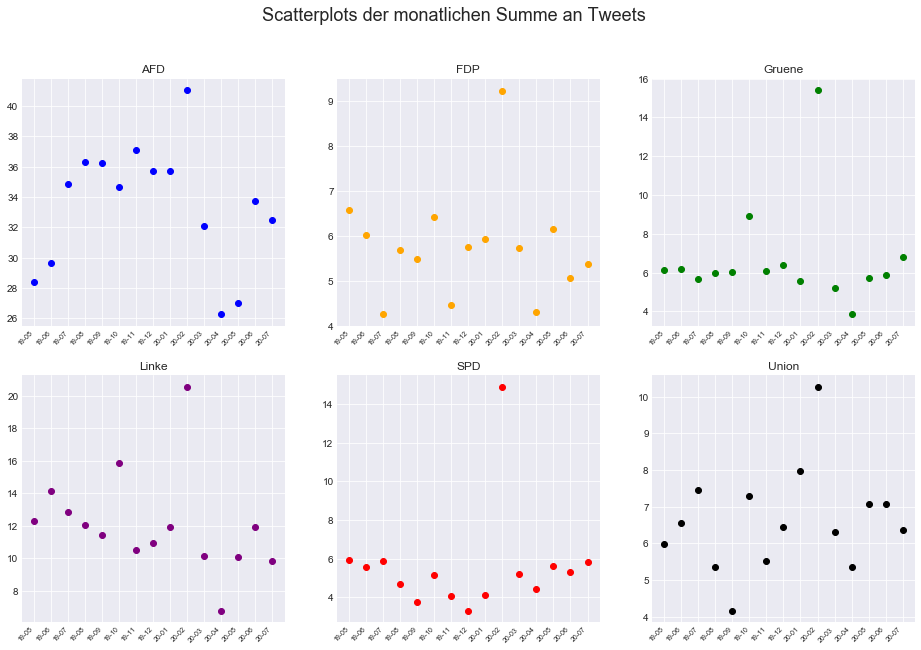

In [162]:
from matplotlib import pyplot
datensatz = twitter_dic['piv_month_rel']
pyplot.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = pyplot.figure(figsize = (16,10))
fig.suptitle('Scatterplots der monatlichen Summe an Tweets', fontsize = 18)

num = 0
for party, n in zip(datensatz.columns, range(1,7)):
    ax = fig.add_subplot(2,3,n)
    ax.scatter(datensatz.index, datensatz[party], color = my_palette[num])
    x_tags = pyplot.xticks(datensatz.index, fontsize = 7, rotation = 45, ha = "right")
    ax.set_title(party)
    num = num + 1

### Histograme

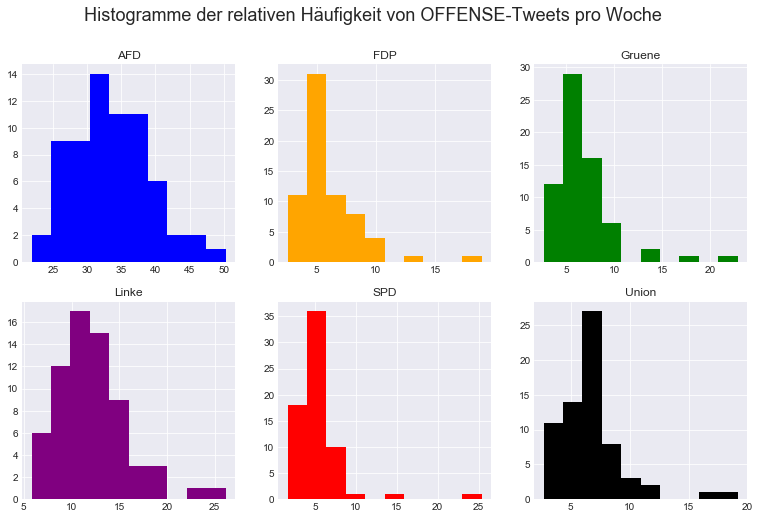

In [212]:
datensatz = twitter_dic['piv_week_rel']
pyplot.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
Parteien = ['AFD', 'FDP', 'Gruene', 'Linke', 'SPD', 'Union']

fig = pyplot.figure(figsize = (13,8))
fig.suptitle('Histogramme der relativen Häufigkeit von OFFENSE-Tweets pro Woche', fontsize = 18)

num = 0
for party, n in zip(datensatz.columns, range(1,7)):
    ax = fig.add_subplot(2,3,n)
    ax.hist(datensatz[party], color = my_palette[num])
    ax.set_title(party)
    num = num + 1


### QQ Plot

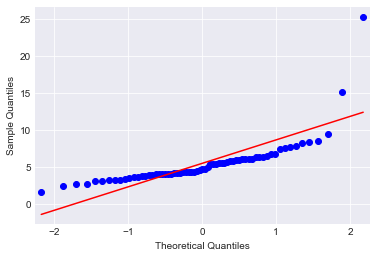

In [199]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot

qqplot(twitter_dic['piv_week_rel']['SPD'], line='s')
pyplot.show()

### Shapiro-Wilk
Ergebnis: 

* Die meisten sind nicht Normalverteilt - überraschend, garnicht bei piv_date Datensätzen! -> Ergibt Sinn, weil Shapiro Wilk nur für < 50 Beobachtungen!
* piv_month und piv_monthOTHER komplett Normalverteilt - Union, Linke und AFD auch bei OFFENSE Tweets
* piv_week und piv_weekOTHER ebenfalls komplett - Nur AfD auch bei OFFENSE Tweets normalverteilt!

In [200]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

partei = []
dataset = []
result = []

for party in twitter_dic['piv_month'].columns:
    for dat in twitter_dic.keys():
        partei.append(party)
        dataset.append(dat)
# normality test
        stat, p = shapiro(twitter_dic[dat][party])

# interpret
        alpha = 0.05
        if p > alpha:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' Gaussian')
        else:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' NOT Gaussian')
            
Shapiro_Wilk_df = pd.DataFrame({'Partei':partei, 'Daten':dataset, 'Ergebnis':result})
Shapiro_Wilk_piv = pd.pivot_table(Shapiro_Wilk_df, values='Ergebnis', index=['Daten'], columns=['Partei'], aggfunc=max)
Shapiro_Wilk_piv

Partei,AFD,FDP,Gruene,Linke,SPD,Union
Daten,,,,,,
piv_date,"Stats=0.950, p=0.000 NOT Gaussian","Stats=0.969, p=0.000 NOT Gaussian","Stats=0.978, p=0.000 NOT Gaussian","Stats=0.960, p=0.000 NOT Gaussian","Stats=0.931, p=0.000 NOT Gaussian","Stats=0.972, p=0.000 NOT Gaussian"
piv_dateOFFENSE,"Stats=0.854, p=0.000 NOT Gaussian","Stats=0.847, p=0.000 NOT Gaussian","Stats=0.566, p=0.000 NOT Gaussian","Stats=0.698, p=0.000 NOT Gaussian","Stats=0.386, p=0.000 NOT Gaussian","Stats=0.883, p=0.000 NOT Gaussian"
piv_dateOTHER,"Stats=0.986, p=0.000 NOT Gaussian","Stats=0.967, p=0.000 NOT Gaussian","Stats=0.980, p=0.000 NOT Gaussian","Stats=0.971, p=0.000 NOT Gaussian","Stats=0.951, p=0.000 NOT Gaussian","Stats=0.973, p=0.000 NOT Gaussian"
piv_date_rel,"Stats=0.992, p=0.015 NOT Gaussian","Stats=0.878, p=0.000 NOT Gaussian","Stats=0.867, p=0.000 NOT Gaussian","Stats=0.945, p=0.000 NOT Gaussian","Stats=0.783, p=0.000 NOT Gaussian","Stats=0.899, p=0.000 NOT Gaussian"
piv_month,"Stats=0.949, p=0.508 Gaussian","Stats=0.938, p=0.361 Gaussian","Stats=0.961, p=0.711 Gaussian","Stats=0.983, p=0.987 Gaussian","Stats=0.974, p=0.912 Gaussian","Stats=0.935, p=0.321 Gaussian"
piv_monthOFFENSE,"Stats=0.941, p=0.389 Gaussian","Stats=0.925, p=0.227 Gaussian","Stats=0.741, p=0.001 NOT Gaussian","Stats=0.814, p=0.006 NOT Gaussian","Stats=0.612, p=0.000 NOT Gaussian","Stats=0.981, p=0.975 Gaussian"
piv_monthOTHER,"Stats=0.926, p=0.240 Gaussian","Stats=0.941, p=0.395 Gaussian","Stats=0.972, p=0.887 Gaussian","Stats=0.980, p=0.970 Gaussian","Stats=0.974, p=0.916 Gaussian","Stats=0.932, p=0.290 Gaussian"
piv_month_rel,"Stats=0.950, p=0.525 Gaussian","Stats=0.848, p=0.016 NOT Gaussian","Stats=0.612, p=0.000 NOT Gaussian","Stats=0.883, p=0.052 Gaussian","Stats=0.578, p=0.000 NOT Gaussian","Stats=0.934, p=0.317 Gaussian"
piv_week,"Stats=0.979, p=0.330 Gaussian","Stats=0.979, p=0.327 Gaussian","Stats=0.973, p=0.144 Gaussian","Stats=0.991, p=0.917 Gaussian","Stats=0.995, p=0.995 Gaussian","Stats=0.985, p=0.622 Gaussian"


## Corellationstests - Twitter all

### Spearman’s Rank Correlation
-> Pearson würde zu gleichen Ergebnisse führen, aber Varianze nicht gleich und nur teilweise Normalverteilt (Verletzt Voraussetzungen)!

*   Observations in each sample are independent and identically distributed (iid).
*   Observations in each sample can be ranked.


*   H0: the two samples are independent.
*   H1: there is a dependency between the samples.

Ergibt Sinn, dass fasst alle dependent sind! -> Getrieben von äußeren Events auf die fast alle Politiker*innen reagieren

In [158]:
from scipy.stats import spearmanr

partei = []
dataset = []
result = []

for party in twitter_dic['piv_month'].columns:
    for dat in twitter_dic.keys():
        partei.append(party)
        dataset.append(dat)
# normality test
        stat, p = spearmanr(twitter_dic[dat][party], twitter_dic[dat]['AFD'])

        if p > 0.05:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + 'INDEPENDENT')
        else:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + 'Probably dependent')
            
Corr_Spearman_df = pd.DataFrame({'Partei':partei, 'Daten':dataset, 'Ergebnis':result})
Corr_Spearman_piv =  pd.pivot_table(Corr_Spearman_df, values='Ergebnis', index=['Daten'], columns=['Partei'], aggfunc=max) 
# Ergibt Sinn, dass ALLE dependent sind!
# -> Getrieben von äußeren Events auf die fast alle Politiker*innen reagieren
Corr_Spearman_piv

Partei,AFD,FDP,Gruene,Linke,SPD,Union
Daten,,,,,,
piv_date,"Stats=1.000, p=0.000Probably dependent","Stats=0.462, p=0.000Probably dependent","Stats=0.444, p=0.000Probably dependent","Stats=0.506, p=0.000Probably dependent","Stats=0.447, p=0.000Probably dependent","Stats=0.352, p=0.000Probably dependent"
piv_dateOFFENSE,"Stats=1.000, p=0.000Probably dependent","Stats=0.300, p=0.000Probably dependent","Stats=0.302, p=0.000Probably dependent","Stats=0.373, p=0.000Probably dependent","Stats=0.302, p=0.000Probably dependent","Stats=0.261, p=0.000Probably dependent"
piv_dateOTHER,"Stats=1.000, p=0.000Probably dependent","Stats=0.468, p=0.000Probably dependent","Stats=0.468, p=0.000Probably dependent","Stats=0.502, p=0.000Probably dependent","Stats=0.445, p=0.000Probably dependent","Stats=0.372, p=0.000Probably dependent"
piv_date_rel,"Stats=1.000, p=0.000Probably dependent","Stats=0.197, p=0.000Probably dependent","Stats=0.175, p=0.000Probably dependent","Stats=0.247, p=0.000Probably dependent","Stats=0.144, p=0.002Probably dependent","Stats=0.202, p=0.000Probably dependent"
piv_month,"Stats=1.000, p=0.000Probably dependent","Stats=0.621, p=0.013Probably dependent","Stats=0.554, p=0.032Probably dependent","Stats=0.786, p=0.001Probably dependent","Stats=0.832, p=0.000Probably dependent","Stats=0.629, p=0.012Probably dependent"
piv_monthOFFENSE,"Stats=1.000, p=0.000Probably dependent","Stats=0.646, p=0.009Probably dependent","Stats=0.618, p=0.014Probably dependent","Stats=0.595, p=0.019Probably dependent","Stats=0.554, p=0.032Probably dependent","Stats=0.507, p=0.054INDEPENDENT"
piv_monthOTHER,"Stats=1.000, p=0.000Probably dependent","Stats=0.550, p=0.034Probably dependent","Stats=0.561, p=0.030Probably dependent","Stats=0.757, p=0.001Probably dependent","Stats=0.743, p=0.002Probably dependent","Stats=0.657, p=0.008Probably dependent"
piv_month_rel,"Stats=1.000, p=0.000Probably dependent","Stats=-0.025, p=0.930INDEPENDENT","Stats=0.336, p=0.221INDEPENDENT","Stats=0.386, p=0.156INDEPENDENT","Stats=-0.286, p=0.302INDEPENDENT","Stats=0.146, p=0.603INDEPENDENT"
piv_week,"Stats=1.000, p=0.000Probably dependent","Stats=0.596, p=0.000Probably dependent","Stats=0.552, p=0.000Probably dependent","Stats=0.634, p=0.000Probably dependent","Stats=0.704, p=0.000Probably dependent","Stats=0.573, p=0.000Probably dependent"


### Chi-Squared Test

Tests whether two categorical variables are related or independent.

*   Observations used in the calculation of the contingency table are independent.
*   25 or more examples in each cell of the contingency table.

-> Es gibt eine Abhängigkeit zwischen Partei und Häufigkeit von OFFENSE/ OTHER Tweets (Bei Tests zwischen einzelnen Parteien nicht immer vorhanden, z.B Grüne und Linke sind dependent, SPD und FDP nicht!)

In [149]:
contingency_table = pd.pivot_table(sent_df_Wien, index = 'user_party', columns = 'predict', aggfunc=np.count_nonzero)['full_text']
# sent_df_Wien_noAfD = sent_df_Wien.loc[(sent_df_Wien['user_party'] == 'Gruene')|(sent_df_Wien['user_party'] == 'Linke')]

In [150]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_table)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=18910.830, p=0.000
Probably dependent


# H01: Die Mitglieder der AfD twittern genauso viele oder weniger OFFENSE-Tweets als die Mitglieder jeder anderen Partei.
* Zur beantwortung der Frage werden 

### Student’s t-test

Tests whether the means of two independent samples are significantly different.

*    Observations in each sample are independent and identically distributed (iid).
*    Observations in each sample are normally distributed.
*    Observations in each sample have the same variance.

Interpretation von stats.ttest_ind(B,A)

*    H0: A >= B (AFD hat insgesamt mehr Tweets als anderen Parteien)
*    H1: B > A  (AFD hat weniger Tweets als andere Parteien)

In [110]:
from scipy.stats import ttest_ind

partei = []
dataset = []
result = []

for party in twitter_dic['piv_month_rel'].columns:
    for dat in twitter_dic.keys():
        partei.append(party)
        dataset.append(dat)
# normality test
        stat, p = ttest_ind(twitter_dic[dat]['AFD'], (twitter_dic[dat][party]))
        if p/2 > 0.05 or stat < 0:    # p/2 für Einseitigen t-Test
            result.append('stat=%.3f, p=%.3f' % (stat, p) + party +' gleich oder mehr als AfD' )
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + party +' hat WENIGER als AfD')
                        
H01_df = pd.DataFrame({'Partei':partei, 'Daten':dataset, 'Ergebnis':result})
H01_piv =  pd.pivot_table(H01_df, values='Ergebnis', index=['Daten'], columns=['Partei'], aggfunc=max) 
H01_piv

Partei,AFD,FDP,Gruene,Linke,SPD,Union
Daten,,,,,,
piv_date,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=-19.313, p=0.000FDP gleich oder mehr als AfD","stat=-14.961, p=0.000Gruene gleich oder mehr a...","stat=-15.282, p=0.000Linke gleich oder mehr al...","stat=-19.260, p=0.000SPD gleich oder mehr als AfD","stat=-17.690, p=0.000Union gleich oder mehr al..."
piv_dateOFFENSE,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=27.031, p=0.000FDP hat WENIGER als AfD","stat=25.578, p=0.000Gruene hat WENIGER als AfD","stat=15.013, p=0.000Linke hat WENIGER als AfD","stat=23.602, p=0.000SPD hat WENIGER als AfD","stat=27.545, p=0.000Union hat WENIGER als AfD"
piv_dateOTHER,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=-27.609, p=0.000FDP gleich oder mehr als AfD","stat=-25.762, p=0.000Gruene gleich oder mehr a...","stat=-24.146, p=0.000Linke gleich oder mehr al...","stat=-30.373, p=0.000SPD gleich oder mehr als AfD","stat=-30.859, p=0.000Union gleich oder mehr al..."
piv_date_rel,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=58.087, p=0.000FDP hat WENIGER als AfD","stat=55.840, p=0.000Gruene hat WENIGER als AfD","stat=41.244, p=0.000Linke hat WENIGER als AfD","stat=58.509, p=0.000SPD hat WENIGER als AfD","stat=55.969, p=0.000Union hat WENIGER als AfD"
piv_month,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=-7.264, p=0.000FDP gleich oder mehr als AfD","stat=-5.013, p=0.000Gruene gleich oder mehr al...","stat=-5.313, p=0.000Linke gleich oder mehr als...","stat=-7.042, p=0.000SPD gleich oder mehr als AfD","stat=-6.540, p=0.000Union gleich oder mehr als..."
piv_monthOFFENSE,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=9.778, p=0.000FDP hat WENIGER als AfD","stat=9.266, p=0.000Gruene hat WENIGER als AfD","stat=5.590, p=0.000Linke hat WENIGER als AfD","stat=8.882, p=0.000SPD hat WENIGER als AfD","stat=9.954, p=0.000Union hat WENIGER als AfD"
piv_monthOTHER,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=-10.714, p=0.000FDP gleich oder mehr als AfD","stat=-8.539, p=0.000Gruene gleich oder mehr al...","stat=-8.258, p=0.000Linke gleich oder mehr als...","stat=-11.280, p=0.000SPD gleich oder mehr als AfD","stat=-12.101, p=0.000Union gleich oder mehr al..."
piv_month_rel,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=25.005, p=0.000FDP hat WENIGER als AfD","stat=21.238, p=0.000Gruene hat WENIGER als AfD","stat=16.025, p=0.000Linke hat WENIGER als AfD","stat=21.914, p=0.000SPD hat WENIGER als AfD","stat=23.888, p=0.000Union hat WENIGER als AfD"
piv_week,"stat=0.000, p=1.000AFD gleich oder mehr als AfD","stat=-10.283, p=0.000FDP gleich oder mehr als AfD","stat=-7.361, p=0.000Gruene gleich oder mehr al...","stat=-7.672, p=0.000Linke gleich oder mehr als...","stat=-9.488, p=0.000SPD gleich oder mehr als AfD","stat=-9.319, p=0.000Union gleich oder mehr als..."


### ANOVA

In [160]:
from scipy.stats import f_oneway
dataset = twitter_dic['piv_week_rel']

stat, p = f_oneway(dataset['AFD'], dataset['FDP'], dataset['Union'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=1013.286, p=0.000
Probably different distributions


## Nichtparametrische - Mann-Whitney U Test

In [170]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu

partei = []
dataset = []
result = []

for party in twitter_dic['piv_month_rel'].columns:
    for dat in twitter_dic.keys():
        partei.append(party)
        dataset.append(dat)
# normality test
        stat, p = mannwhitneyu(twitter_dic[dat]['AFD'], twitter_dic[dat][party])
        if p > 0.05:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + party +' gleich oder weniger als AfD' )
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + party +' AfD hat mehr')

          
Mann_Whitney_df = pd.DataFrame({'Partei':partei, 'Daten':dataset, 'Ergebnis':result})
Mann_Whitney_piv =  pd.pivot_table(Mann_Whitney_df, values='Ergebnis', index=['Daten'], columns=['Partei'], aggfunc=max) 
Mann_Whitney_piv

Partei,AFD,FDP,Gruene,Linke,SPD,Union
Daten,,,,,,
piv_date,"stat=103058.000, p=0.500AFD gleich oder wenige...","stat=37366.500, p=0.000FDP AfD hat mehr","stat=50464.000, p=0.000Gruene AfD hat mehr","stat=48051.000, p=0.000Linke AfD hat mehr","stat=33880.500, p=0.000SPD AfD hat mehr","stat=39861.500, p=0.000Union AfD hat mehr"
piv_dateOFFENSE,"stat=103058.000, p=0.500AFD gleich oder wenige...","stat=11367.500, p=0.000FDP AfD hat mehr","stat=10629.000, p=0.000Gruene AfD hat mehr","stat=35991.500, p=0.000Linke AfD hat mehr","stat=9922.000, p=0.000SPD AfD hat mehr","stat=10488.500, p=0.000Union AfD hat mehr"
piv_dateOTHER,"stat=103058.000, p=0.500AFD gleich oder wenige...","stat=15317.000, p=0.000FDP AfD hat mehr","stat=21788.000, p=0.000Gruene AfD hat mehr","stat=24334.500, p=0.000Linke AfD hat mehr","stat=10527.500, p=0.000SPD AfD hat mehr","stat=11879.000, p=0.000Union AfD hat mehr"
piv_date_rel,"stat=103058.000, p=0.500AFD gleich oder wenige...","stat=712.500, p=0.000FDP AfD hat mehr","stat=1204.000, p=0.000Gruene AfD hat mehr","stat=5432.000, p=0.000Linke AfD hat mehr","stat=1108.500, p=0.000SPD AfD hat mehr","stat=967.500, p=0.000Union AfD hat mehr"
piv_month,"stat=112.500, p=0.492AFD gleich oder weniger a...","stat=10.000, p=0.000FDP AfD hat mehr","stat=21.000, p=0.000Gruene AfD hat mehr","stat=17.000, p=0.000Linke AfD hat mehr","stat=9.000, p=0.000SPD AfD hat mehr","stat=8.000, p=0.000Union AfD hat mehr"
piv_monthOFFENSE,"stat=112.500, p=0.492AFD gleich oder weniger a...","stat=0.000, p=0.000FDP AfD hat mehr","stat=1.000, p=0.000Gruene AfD hat mehr","stat=12.000, p=0.000Linke AfD hat mehr","stat=6.000, p=0.000SPD AfD hat mehr","stat=0.000, p=0.000Union AfD hat mehr"
piv_monthOTHER,"stat=112.500, p=0.492AFD gleich oder weniger a...","stat=0.000, p=0.000FDP AfD hat mehr","stat=1.000, p=0.000Gruene AfD hat mehr","stat=1.000, p=0.000Linke AfD hat mehr","stat=0.000, p=0.000SPD AfD hat mehr","stat=0.000, p=0.000Union AfD hat mehr"
piv_month_rel,"stat=112.500, p=0.492AFD gleich oder weniger a...","stat=0.000, p=0.000FDP AfD hat mehr","stat=0.000, p=0.000Gruene AfD hat mehr","stat=0.000, p=0.000Linke AfD hat mehr","stat=0.000, p=0.000SPD AfD hat mehr","stat=0.000, p=0.000Union AfD hat mehr"
piv_week,"stat=2244.500, p=0.499AFD gleich oder weniger ...","stat=477.000, p=0.000FDP AfD hat mehr","stat=849.500, p=0.000Gruene AfD hat mehr","stat=772.000, p=0.000Linke AfD hat mehr","stat=540.500, p=0.000SPD AfD hat mehr","stat=577.000, p=0.000Union AfD hat mehr"


In [183]:
import numpy as np
import pingouin as pg
from pingouin import ttest
#https://pingouin-stats.org/generated/pingouin.mwu.html
#https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest


for party in twitter_dic['piv_month_rel'].columns:
    dat = twitter_dic['piv_week_rel']
    partei.append(party)
    dataset.append(dat)
# normality test
    print(party)
    print(mannwhitneyu(dat['AFD'], dat[party]))
    print(pg.mwu(dat[party], dat['AFD']))
    #print(ttest(dat['AFD'], dat[party], paired=True, tail='greater').round(2))
        


AFD
MannwhitneyuResult(statistic=2244.5, pvalue=0.49911230263080303)
      U-val       tail     p-val  RBC      CLES
MWU  2244.5  two-sided  0.998225  0.0  0.492537
FDP
MannwhitneyuResult(statistic=0.0, pvalue=8.815331204765847e-24)
     U-val       tail         p-val  RBC  CLES
MWU    0.0  two-sided  1.763066e-23  1.0   1.0
Gruene
MannwhitneyuResult(statistic=2.0, pvalue=9.643865608553291e-24)
     U-val       tail         p-val       RBC      CLES
MWU    2.0  two-sided  1.928773e-23  0.999109  0.999554
Linke
MannwhitneyuResult(statistic=10.0, pvalue=1.3795656944740645e-23)
     U-val       tail         p-val       RBC      CLES
MWU   10.0  two-sided  2.759131e-23  0.995545  0.997772
SPD
MannwhitneyuResult(statistic=6.0, pvalue=1.1534816020019122e-23)
     U-val       tail         p-val       RBC      CLES
MWU    6.0  two-sided  2.306963e-23  0.997327  0.998663
Union
MannwhitneyuResult(statistic=0.0, pvalue=8.816438065474192e-24)
     U-val       tail         p-val  RBC  CLES
MWU    0

# H02: Die Häufigkeit von OFFENSE-Tweets vor dem Corona Lockdown unterscheidet sich NICHT von der während des Lockdowns.

=> WICHTIG: Für H02-H04 muss beachtet werden, dass es sich um verbundene Stichproben handelt!

In [184]:
# Eingrenzen der relevanten Zeiträume
sent_Corona = sent_df_Wien.loc[(sent_df_Wien['date'] >= datetime.date(2020,3,13))
                & (sent_df_Wien['date'] < datetime.date(2020,5,6))]

sent_before_Corona = sent_df_Wien.loc[(sent_df_Wien['date'] < datetime.date(2020,3,13))]
sent_after_Corona = sent_df_Wien.loc[(sent_df_Wien['date'] >= datetime.date(2020,5,6))]

In [185]:
# Erstelle Dictionarys für Zeträume
import pandas as pd

Corona_dic = {}
before_Corona_dic = {}
after_Corona_dic = {}

dics =[Corona_dic, before_Corona_dic, after_Corona_dic]
datasets = [sent_Corona, sent_before_Corona, sent_after_Corona]

for dataset, dic in zip(datasets, dics):
    time = ['month', 'week', 'date']
    cat = ['', 'OFFENSE', 'OTHER']
    
    for c in cat: 
        if c == '':
            sent_df = dataset
        else:
            sent_df = dataset.loc[dataset['predict'] == c]
        for t in time:
            dic['piv_'+t+c] = pd.pivot_table(sent_df, index = [t], columns = ['user_party'], aggfunc = np.count_nonzero)['full_text'].fillna(0)         
            
for t in time:
    for dic in dics:
        # Normiere OFFENSE Tweets
        dic['piv_'+t+'_rel'] = (dic['piv_'+t+'OFFENSE'] / dic['piv_'+t])*100

## Check for Normality

In [33]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

durch = []
abw = []
partei = []
daten = []
dic = before_Corona_dic

for dat, n in zip(dic, dic.keys()):
    for party in dic['piv_month'].columns:
        daten.append(n)
        partei.append(party)
        durch.append(mean(dic[dat][party]).round())
        abw.append(std(dic[dat][party]))

mean_std = pd.DataFrame({'Datensatz': daten, 'Partei': partei, 'Mean': durch, 'Std': abw})
#mean_std

### Scatterplots

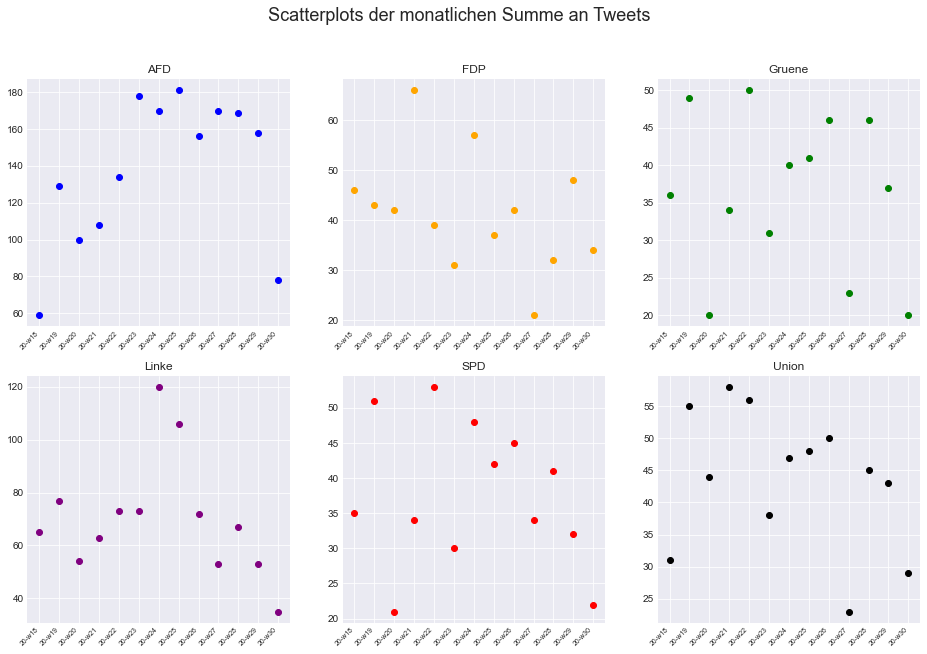

In [88]:
from matplotlib import pyplot
datensatz = after_Corona_dic['piv_weekOFFENSE']
pyplot.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = pyplot.figure(figsize = (16,10))
fig.suptitle('Scatterplots der monatlichen Summe an Tweets', fontsize = 18)

num = 0
for party, n in zip(Corona_dic['piv_date'].columns, range(1,7)):
    ax = fig.add_subplot(2,3,n)
    ax.scatter(datensatz.index, datensatz[party], color = my_palette[num])
    x_tags = pyplot.xticks(datensatz.index, fontsize = 7, rotation = 45, ha = "right")
    ax.set_title(party)
    num = num + 1

### Histograme

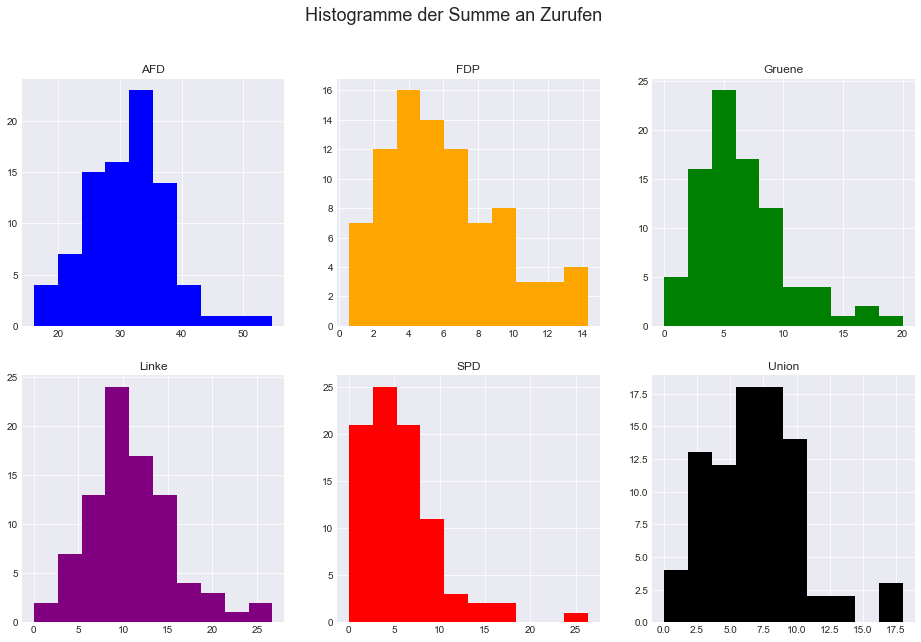

In [92]:
datensatz =  after_Corona_dic['piv_date_rel']
pyplot.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
Parteien = ['AFD', 'FDP', 'Gruene', 'Linke', 'SPD', 'Union']

fig = pyplot.figure(figsize = (16,10))
fig.suptitle('Histogramme der Summe an Zurufen', fontsize = 18)

num = 0
for party, n in zip(Corona_dic['piv_week'].columns, range(1,7)):
    ax = fig.add_subplot(2,3,n)
    ax.hist(datensatz[party], color = my_palette[num])
    ax.set_title(party)
    num = num + 1


### Shapiro-Wilk

In [93]:
from scipy.stats import shapiro

partei = []
dataset = []
result = []
dic = after_Corona_dic

for party in Corona_dic['piv_date'].columns:
    for dat in dic.keys():
        partei.append(party)
        dataset.append(dat)
# normality test H0: Dataset frwan from Gausian distribution
        stat, p = shapiro(dic[dat][party])

        alpha = 0.05
        if p > alpha:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' Gaussian') # Weise H0 nicht zurück
        else:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' NOT Gaussian')
            
Shapiro_Wilk_Corona_df = pd.DataFrame({'Partei':partei, 'Daten':dataset, 'Ergebnis':result})
Shapiro_Wilk_Corona_piv = pd.pivot_table(Shapiro_Wilk_Corona_df, values='Ergebnis', index=['Daten'], columns=['Partei'], aggfunc=max)
Shapiro_Wilk_Corona_piv

Partei,AFD,FDP,Gruene,Linke,SPD,Union
Daten,,,,,,
piv_date,"Stats=0.976, p=0.112 Gaussian","Stats=0.971, p=0.048 NOT Gaussian","Stats=0.951, p=0.003 NOT Gaussian","Stats=0.950, p=0.002 NOT Gaussian","Stats=0.908, p=0.000 NOT Gaussian","Stats=0.952, p=0.003 NOT Gaussian"
piv_dateOFFENSE,"Stats=0.909, p=0.000 NOT Gaussian","Stats=0.922, p=0.000 NOT Gaussian","Stats=0.864, p=0.000 NOT Gaussian","Stats=0.851, p=0.000 NOT Gaussian","Stats=0.933, p=0.000 NOT Gaussian","Stats=0.963, p=0.015 NOT Gaussian"
piv_dateOTHER,"Stats=0.977, p=0.122 Gaussian","Stats=0.965, p=0.019 NOT Gaussian","Stats=0.951, p=0.003 NOT Gaussian","Stats=0.953, p=0.003 NOT Gaussian","Stats=0.907, p=0.000 NOT Gaussian","Stats=0.950, p=0.002 NOT Gaussian"
piv_date_rel,"Stats=0.979, p=0.170 Gaussian","Stats=0.955, p=0.005 NOT Gaussian","Stats=0.932, p=0.000 NOT Gaussian","Stats=0.972, p=0.060 Gaussian","Stats=0.871, p=0.000 NOT Gaussian","Stats=0.959, p=0.008 NOT Gaussian"
piv_month,"Stats=0.884, p=0.337 Gaussian","Stats=0.799, p=0.111 Gaussian","Stats=0.789, p=0.088 Gaussian","Stats=0.898, p=0.378 Gaussian","Stats=0.965, p=0.641 Gaussian","Stats=0.770, p=0.046 NOT Gaussian"
piv_monthOFFENSE,"Stats=0.900, p=0.385 Gaussian","Stats=0.960, p=0.618 Gaussian","Stats=0.959, p=0.612 Gaussian","Stats=0.775, p=0.056 Gaussian","Stats=0.989, p=0.797 Gaussian","Stats=0.942, p=0.537 Gaussian"
piv_monthOTHER,"Stats=0.869, p=0.294 Gaussian","Stats=0.851, p=0.244 Gaussian","Stats=0.817, p=0.156 Gaussian","Stats=0.927, p=0.476 Gaussian","Stats=0.964, p=0.636 Gaussian","Stats=0.766, p=0.035 NOT Gaussian"
piv_month_rel,"Stats=0.892, p=0.359 Gaussian","Stats=0.893, p=0.364 Gaussian","Stats=0.783, p=0.074 Gaussian","Stats=0.972, p=0.676 Gaussian","Stats=0.949, p=0.564 Gaussian","Stats=0.997, p=0.904 Gaussian"
piv_week,"Stats=0.913, p=0.199 Gaussian","Stats=0.917, p=0.231 Gaussian","Stats=0.973, p=0.925 Gaussian","Stats=0.945, p=0.531 Gaussian","Stats=0.918, p=0.234 Gaussian","Stats=0.955, p=0.683 Gaussian"


In [104]:
contingency_Corona = pd.pivot_table(sent_after_Corona, index = 'user_party', columns = 'predict', aggfunc=np.count_nonzero)['full_text']
contingency_Corona

predict,OFFENSE,OTHER
user_party,,
AFD,1790,3863
FDP,538,8937
Gruene,473,7199
Linke,911,7468
SPD,488,8106
Union,567,7841


In [105]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_Corona)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')
# Häufigkeit OFFENSE oder OTHER ist abhängig von der Partei 

stat=3587.829, p=0.000
Probably dependent


In [ ]:
## T-Test eigentlich schlecht - weil nicht normalverteilt!

from scipy.stats import ttest_ind
partei = []
result = []    

for party in before_Corona_rel_piv.columns:
        partei.append(party)
# normality test
        stat, p = ttest_ind(before_Corona_rel_piv[party], Corona_rel_piv[party])
        if p/2 > 0.05 or stat < 0:    # p/2 für Einseitigen t-Test
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Gleich oder mehr als vor dem Lockdown' )
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' WENIGER als vor dem Lockdown')
          
                        
H03_bef_Corona_df = pd.DataFrame({'Partei':partei, 'Ergebnis':result})
H03_bef_Corona_df

## Wilcoxon Rang Test

Da getestet werden soll, ob vor- bzw. nach dem Lockdown MEHR OFFENSE-Tweets abgesetzt wurden, werden einseitige Tests durchgeführt!

ABER: Es wird nicht die option "alternative = 'greater'" (scipy) oder "tail='greater'" (pinguin) verwendet! Beide passen den p-Wert automatisch an und zeigen die aufsummierten Ränge von der größeren Statistik. Das entspricht nicht den gängigen Anleitungen, nach denen der kleinere Wert der Statistik unter einem Schwellenwert liegen muss. Der p Wert wird also "manuell" halbiert und mit dem Ergebnis verglichen

In [ ]:
# Example of the Mann-Whitney U Test
from scipy.stats import wilcoxon

partei = []
result = []

for party in before_Corona_rel_piv.columns:
        partei.append(party)
# normality test
        stat, p = wilcoxon(before_Corona_dic['piv_week_rel'][38:][party], Corona_dic['piv_week_rel'][party])
        #stat, p = wilcoxon(before_Corona_dic['piv_date_rel'][260:][party], Corona_dic['piv_date_rel'][party])
        if p/2 > 0.05:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Gleich oder mehr als vor dem Lockdown')
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' WENIGER als vor dem Lockdown')

          
wilcoxon_df = pd.DataFrame({'Partei':partei, 'Ergebnis':result})
wilcoxon_df

In [152]:
import numpy as np
import pingouin as pg
from pingouin import ttest
#https://pingouin-stats.org/generated/pingouin.mwu.html
#https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

for party in before_Corona_dic['piv_date_rel'].columns:
# normality test
        #stat, p = wilcoxon(before_Corona_dic['piv_week_rel'][38:][party], Corona_dic['piv_week_rel'][party])
        print(party)
        #print(pg.wilcoxon(before_Corona_dic['piv_date_rel'][260:][party], Corona_dic['piv_date_rel'][party]))
        print(pg.wilcoxon(before_Corona_dic['piv_week_rel'][38:][party], Corona_dic['piv_week_rel'][party]))

AFD
          W-val       tail     p-val  RBC      CLES
Wilcoxon    0.0  two-sided  0.003906  1.0  0.975309
FDP
          W-val       tail     p-val  RBC  CLES
Wilcoxon    0.0  two-sided  0.003906  1.0   1.0
Gruene
          W-val       tail     p-val  RBC  CLES
Wilcoxon    0.0  two-sided  0.003906  1.0   1.0
Linke
          W-val       tail     p-val  RBC  CLES
Wilcoxon    0.0  two-sided  0.003906  1.0   1.0
SPD
          W-val       tail     p-val       RBC      CLES
Wilcoxon    3.0  two-sided  0.019531  0.866667  0.814815
Union
          W-val       tail     p-val       RBC      CLES
Wilcoxon    2.0  two-sided  0.011719  0.911111  0.864198


In [151]:
before_Corona_dic['piv_week_rel'][38:]
#before_Corona_dic['piv_week_rel']

user_party,AFD,FDP,Gruene,Linke,SPD,Union
week,,,,,,
20-w02,29.770992,5.306604,4.924761,11.574697,3.162651,5.311077
20-w03,31.937173,6.055646,5.942275,12.318841,3.921569,6.840391
20-w04,35.734072,6.401766,4.761905,13.196481,6.501548,8.417508
20-w05,46.585736,9.472551,22.864322,26.137566,25.359343,12.390671
20-w06,40.422323,8.712614,9.781022,17.625899,9.503696,6.849315
20-w07,41.970021,10.000000,14.656772,23.316913,15.200000,16.086957
20-w08,35.029354,8.930818,13.761468,14.218750,8.300908,7.357860
20-w09,50.256410,12.705882,9.417596,19.719953,8.578745,11.495674
20-w10,30.000000,5.371248,5.731225,9.689922,4.502814,6.609808


In [143]:
# Randomisierte ziehung der neun Wochen aus den Wochen vor dem Lockdown
import random

sample_before = random.sample(list(before_Corona_dic['piv_week_rel'].index), 9)
before_week_sample = before_Corona_dic['piv_week_rel'].loc[sample_before]

for party in before_Corona_dic['piv_date_rel'].columns:
# normality test
        #stat, p = wilcoxon(before_Corona_dic['piv_week_rel'][38:][party], Corona_dic['piv_week_rel'][party])
        print(party)
        #print(pg.wilcoxon(before_Corona_dic['piv_date_rel'][260:][party], Corona_dic['piv_date_rel'][party]))
        print(pg.wilcoxon(before_week_sample[party], Corona_dic['piv_week_rel'][party]))

AFD
          W-val       tail     p-val       RBC      CLES
Wilcoxon    1.0  two-sided  0.007812  0.955556  0.975309
FDP
          W-val       tail     p-val       RBC      CLES
Wilcoxon    2.0  two-sided  0.011719  0.911111  0.925926
Gruene
          W-val       tail     p-val  RBC  CLES
Wilcoxon    0.0  two-sided  0.003906  1.0   1.0
Linke
          W-val       tail     p-val  RBC  CLES
Wilcoxon    0.0  two-sided  0.003906  1.0   1.0
SPD
          W-val       tail     p-val       RBC      CLES
Wilcoxon   16.0  two-sided  0.496094  0.288889  0.617284
Union
          W-val       tail     p-val       RBC      CLES
Wilcoxon   11.0  two-sided  0.203125  0.511111  0.641975


# H03: Die Häufigkeit von OFFENSE-Tweets während dem Corona Lockdown unterscheidet sich NICHT von der nach dem Lockdown.

In [109]:
## T-Test eigentlich schlecht - weil nicht normalverteilt!

from scipy.stats import ttest_ind
partei = []
result = []    

for party in after_Corona_rel_piv.columns:
        partei.append(party)
# normality test
        stat, p = ttest_ind(after_Corona_rel_piv[party], Corona_rel_piv[party])
        if p/2 > 0.05 or stat < 0:    # p/2 für Einseitigen t-Test
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Gleich oder mehr als nach dem Lockdown' )
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' WENIGER als nach dem Lockdown')
          
                        
H03_bef_Corona_df = pd.DataFrame({'Partei':partei, 'Ergebnis':result})
H03_bef_Corona_df

,Partei,Ergebnis
0,AFD,"stat=4.528, p=0.000 WENIGER als nach dem Lockdown"
1,FDP,"stat=3.535, p=0.001 WENIGER als nach dem Lockdown"
2,Gruene,"stat=4.372, p=0.000 WENIGER als nach dem Lockdown"
3,Linke,"stat=5.809, p=0.000 WENIGER als nach dem Lockdown"
4,SPD,"stat=2.236, p=0.027 WENIGER als nach dem Lockdown"
5,Union,"stat=2.873, p=0.005 WENIGER als nach dem Lockdown"


In [157]:
# Example of the Mann-Whitney U Test
from scipy.stats import wilcoxon

partei = []
result = []

for party in before_Corona_rel_piv.columns:
        partei.append(party)
# normality test
        stat, p = wilcoxon(after_Corona_dic['piv_week_rel'][:9][party], Corona_dic['piv_week_rel'][party])
        #stat, p = wilcoxon(after_Corona_dic['piv_date_rel'][:54][party], Corona_dic['piv_date_rel'][party])
        if p/2 > 0.05:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Gleich oder mehr als nach dem Lockdown')
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' WENIGER als nach dem Lockdown')

          
wilcoxon_df = pd.DataFrame({'Partei':partei, 'Ergebnis':result})
wilcoxon_df

,Partei,Ergebnis
0,AFD,"stat=0.000, p=0.004 WENIGER als nach dem Lockdown"
1,FDP,"stat=0.000, p=0.004 WENIGER als nach dem Lockdown"
2,Gruene,"stat=0.000, p=0.004 WENIGER als nach dem Lockdown"
3,Linke,"stat=0.000, p=0.004 WENIGER als nach dem Lockdown"
4,SPD,"stat=2.000, p=0.012 WENIGER als nach dem Lockdown"
5,Union,"stat=6.000, p=0.055 WENIGER als nach dem Lockdown"


In [158]:
import numpy as np
import pingouin as pg
from pingouin import ttest
#https://pingouin-stats.org/generated/pingouin.mwu.html
#https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

for party in before_Corona_dic['piv_date_rel'].columns:
# normality test
        #stat, p = wilcoxon(before_Corona_dic['piv_week_rel'][38:][party], Corona_dic['piv_week_rel'][party])
        print(party)
        #print(pg.wilcoxon(after_Corona_dic['piv_date_rel'][:54][party], Corona_dic['piv_date_rel'][party]))
        print(pg.wilcoxon(after_Corona_dic['piv_week_rel'][:9][party], Corona_dic['piv_week_rel'][party]))

AFD
          W-val       tail     p-val  RBC      CLES
Wilcoxon    0.0  two-sided  0.003906  1.0  0.925926
FDP
          W-val       tail     p-val  RBC      CLES
Wilcoxon    0.0  two-sided  0.003906  1.0  0.876543
Gruene
          W-val       tail     p-val  RBC      CLES
Wilcoxon    0.0  two-sided  0.003906  1.0  0.925926
Linke
          W-val       tail     p-val  RBC  CLES
Wilcoxon    0.0  two-sided  0.003906  1.0   1.0
SPD
          W-val       tail     p-val       RBC      CLES
Wilcoxon    2.0  two-sided  0.011719  0.911111  0.814815
Union
          W-val       tail     p-val       RBC      CLES
Wilcoxon    6.0  two-sided  0.054688  0.733333  0.765432


# H04: Die Häufigkeit von OFFENSE-Tweets vor dem Corona Lockdown unterscheidet sich NICHT von der nach dem Lockdown.

In [188]:
before_Corona_rel_piv = (before_Corona_dic['piv_dateOFFENSE'] / before_Corona_dic['piv_date'])*100
after_Corona_rel_piv = ((after_Corona_dic['piv_dateOFFENSE']/ after_Corona_dic['piv_date'])*100).fillna(0)
bef_Corona_rel_piv = before_Corona_rel_piv[228:]

In [129]:
len(before_Corona_rel_piv) - len(after_Corona_rel_piv)
len(before_Corona_rel_piv[228:])

86

In [189]:
from scipy.stats import ttest_rel
partei = []
result = []    

for party in after_Corona_rel_piv.columns:
        partei.append(party)
# normality test
        stat, p = ttest_rel(after_Corona_rel_piv[party], bef_Corona_rel_piv[party])
        if p > 0.05:    
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Gleiche Häufigkeit vor und nach dem Lockdown' )
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Andere Häufigkeiten vor und nach dem Lockdown')
          
                        
H04_Corona_df = pd.DataFrame({'Partei':partei, 'Ergebnis':result})
H04_Corona_df

,Partei,Ergebnis
0,AFD,"stat=-5.121, p=0.000 Andere Häufigkeiten vor u..."
1,FDP,"stat=-3.351, p=0.001 Andere Häufigkeiten vor u..."
2,Gruene,"stat=-2.712, p=0.008 Andere Häufigkeiten vor u..."
3,Linke,"stat=-3.778, p=0.000 Andere Häufigkeiten vor u..."
4,SPD,"stat=-1.276, p=0.205 Gleiche Häufigkeit vor un..."
5,Union,"stat=-2.690, p=0.009 Andere Häufigkeiten vor u..."


In [190]:
from scipy.stats import wilcoxon

partei = []
result = []

for party in before_Corona_rel_piv.columns:
        partei.append(party)
# normality test
        stat, p = wilcoxon(after_Corona_dic['piv_week_rel'][party], before_Corona_dic['piv_week_rel'][34:][party])
        #stat, p = wilcoxon(after_Corona_dic['piv_date_rel'][party], before_Corona_dic['piv_date_rel'][228:][party])
        if p/2 > 0.05:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Davor weniger oder gleich')
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Davor MEHR')

          
wilcoxon_df = pd.DataFrame({'Partei':partei, 'Ergebnis':result})
wilcoxon_df

,Partei,Ergebnis
0,AFD,"stat=5.000, p=0.002 Davor MEHR"
1,FDP,"stat=9.000, p=0.008 Davor MEHR"
2,Gruene,"stat=22.000, p=0.110 Davor weniger oder gleich"
3,Linke,"stat=11.000, p=0.013 Davor MEHR"
4,SPD,"stat=36.000, p=0.542 Davor weniger oder gleich"
5,Union,"stat=15.000, p=0.033 Davor MEHR"


In [172]:
import numpy as np
import pingouin as pg
from pingouin import ttest
#https://pingouin-stats.org/generated/pingouin.mwu.html
#https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

for party in before_Corona_dic['piv_date_rel'].columns:
# normality test
        #stat, p = wilcoxon(before_Corona_dic['piv_week_rel'][38:][party], Corona_dic['piv_week_rel'][party])
        print(party)
        #print(pg.wilcoxon(after_Corona_dic['piv_date_rel'][party], before_Corona_dic['piv_date_rel'][228:][party], tail='less'))
        print(pg.wilcoxon(before_Corona_dic['piv_week_rel'][34:][party], after_Corona_dic['piv_week_rel'][party]))

AFD
          W-val       tail     p-val      RBC      CLES
Wilcoxon    5.0  two-sided  0.002441  0.89011  0.852071
FDP
          W-val       tail     p-val       RBC      CLES
Wilcoxon    9.0  two-sided  0.008057  0.802198  0.828402
Gruene
          W-val       tail     p-val       RBC      CLES
Wilcoxon   22.0  two-sided  0.109863  0.516484  0.686391
Linke
          W-val       tail     p-val       RBC      CLES
Wilcoxon   11.0  two-sided  0.013428  0.758242  0.810651
SPD
          W-val       tail     p-val       RBC      CLES
Wilcoxon   36.0  two-sided  0.541748  0.208791  0.508876
Union
          W-val       tail     p-val      RBC      CLES
Wilcoxon   15.0  two-sided  0.032715  0.67033  0.710059


# Plenum

In [1]:
import pickle, gensim, numpy as np
import pandas as pd 

#df_kom = mdp_partei_emo
PICKLE_FOLDER_PATH = '/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Plenum/'
#pickle.dump(df_kom, open(PICKLE_FOLDER_PATH + 'Plenum_Kom_all_Sent', "wb" ))

df_kom = pickle.load(open(PICKLE_FOLDER_PATH + 'Plenum_Kom_all_Sent', "rb" ))

In [2]:
import pandas as pd
time = ['Monat', 'Woche', 'date_str']
cat = ['', 'OFFENSE', 'OTHER']
plenum_dic = {}


for c in cat: 
    if c == '':
        sent_df = df_kom
    else:
        sent_df = df_kom.loc[df_kom['predict'] == c]
    for t in time: 
        piv = pd.pivot_table(sent_df, index = [t], columns = ['Partei'], aggfunc = np.count_nonzero)['Beschreibung1'].fillna(0)
        
        plenum_dic['piv_'+t+c] =  piv       
            
for woche in ['17-w43', '18-w03', '18-w36', '19-w29', '19-w36']:
    plenum_dic['piv_Woche'] = plenum_dic['piv_Woche'].loc[plenum_dic['piv_Woche'].index != woche]
    plenum_dic['piv_WocheOFFENSE'] = plenum_dic['piv_WocheOFFENSE'].loc[plenum_dic['piv_WocheOFFENSE'].index != woche]

# Normiere OFFENSE Tweets
plenum_dic['piv_Woche_rel'] = (plenum_dic['piv_WocheOFFENSE'] / plenum_dic['piv_Woche'])*100
    
plenum_dic.keys()

dict_keys(['piv_Monat', 'piv_Woche', 'piv_date_str', 'piv_MonatOFFENSE', 'piv_WocheOFFENSE', 'piv_date_strOFFENSE', 'piv_MonatOTHER', 'piv_WocheOTHER', 'piv_date_strOTHER', 'piv_Woche_rel'])

# Check for Normality

### Scatterplots

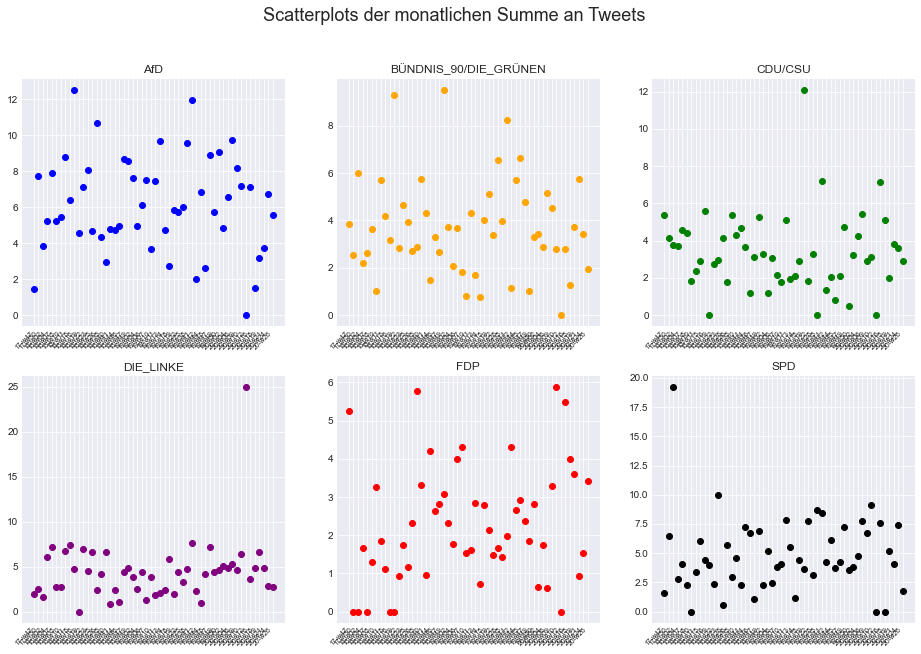

In [44]:
from matplotlib import pyplot
datensatz = plenum_dic['piv_Woche_rel']
pyplot.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']

fig = pyplot.figure(figsize = (16,10))
fig.suptitle('Scatterplots der monatlichen Summe an Tweets', fontsize = 18)

num = 0
for party, n in zip(plenum_dic['piv_Woche_rel'].columns, range(1,7)):
    ax = fig.add_subplot(2,3,n)
    ax.scatter(datensatz.index, datensatz[party], color = my_palette[num])
    x_tags = pyplot.xticks(datensatz.index, fontsize = 7, rotation = 45, ha = "right")
    ax.set_title(party)
    num = num + 1

### Histograme

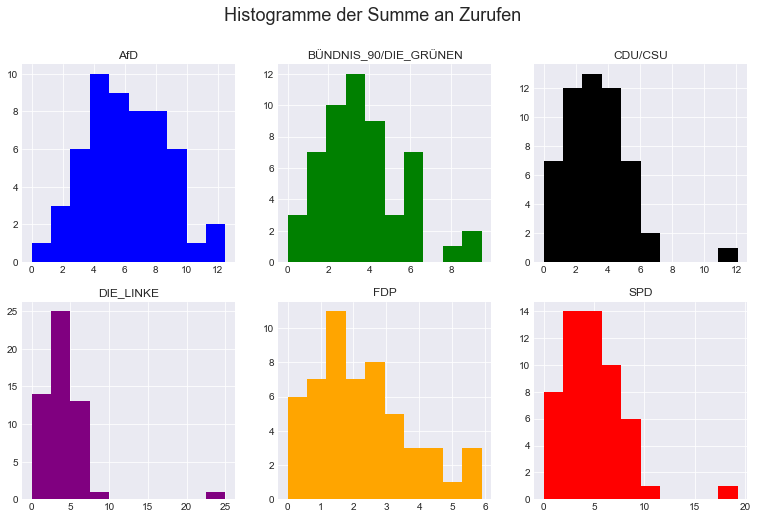

In [151]:
datensatz =  plenum_dic['piv_Woche_rel']
pyplot.style.use('seaborn-darkgrid')
my_palette = ['blue', 'green', 'black', 'purple', 'orange', 'red']

fig = pyplot.figure(figsize = (13,8))
fig.suptitle('Histogramme der Summe an Zurufen', fontsize = 18)

num = 0
for party, n in zip(plenum_dic['piv_Woche_rel'].columns, range(1,7)):
    ax = fig.add_subplot(2,3,n)
    ax.hist(datensatz[party], color = my_palette[num])
    ax.set_title(party)
    num = num + 1


In [150]:
from numpy import mean
from numpy import std
partei = []
durch = []
abw = []

for party in plenum_dic['piv_Woche_rel'].columns:
        partei.append(party)
        durch.append('Mean: '+ str(mean(plenum_dic['piv_Woche_rel'][party]).round(3)))
        abw.append('Std:'+str(std(plenum_dic['piv_Woche_rel'][party]).round(3)))
        
plenum_data_mean_std = pd.DataFrame({'Partei': partei, 'Mean': durch, 'Std': abw})
plenum_data_mean_std

,Partei,Mean,Std
0,AfD,Mean: 6.143,Std:2.624
1,BÜNDNIS_90/DIE_GRÜNEN,Mean: 3.676,Std:2.016
2,CDU/CSU,Mean: 3.347,Std:2.047
3,DIE_LINKE,Mean: 4.426,Std:3.419
4,FDP,Mean: 2.261,Std:1.515
5,SPD,Mean: 4.82,Std:3.162


### Shapiro-Wilk

In [46]:
from scipy.stats import shapiro

partei = []
dataset = []
result = []

for party in plenum_dic['piv_date_str'].columns:
    for dat in plenum_dic.keys():
        partei.append(party)
        dataset.append(dat)
# normality test
        stat, p = shapiro(plenum_dic[dat][party])

        alpha = 0.05
        if p > alpha:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' Gaussian')
        else:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' NOT Gaussian')
            
Shapiro_Wilk_plen_df = pd.DataFrame({'Partei':partei, 'Daten':dataset, 'Ergebnis':result})
Shapiro_Wilk_plen_piv = pd.pivot_table(Shapiro_Wilk_plen_df, values='Ergebnis', index=['Daten'], columns=['Partei'], aggfunc=max)
Shapiro_Wilk_plen_piv

Partei,AfD,BÜNDNIS_90/DIE_GRÜNEN,CDU/CSU,DIE_LINKE,FDP,SPD
Daten,,,,,,
piv_Monat,"Stats=0.963, p=0.334 Gaussian","Stats=0.966, p=0.394 Gaussian","Stats=0.961, p=0.287 Gaussian","Stats=0.972, p=0.552 Gaussian","Stats=0.955, p=0.201 Gaussian","Stats=0.949, p=0.139 Gaussian"
piv_MonatOFFENSE,"Stats=0.966, p=0.417 Gaussian","Stats=0.930, p=0.044 NOT Gaussian","Stats=0.948, p=0.134 Gaussian","Stats=0.905, p=0.010 NOT Gaussian","Stats=0.910, p=0.013 NOT Gaussian","Stats=0.944, p=0.105 Gaussian"
piv_MonatOTHER,"Stats=0.963, p=0.331 Gaussian","Stats=0.966, p=0.397 Gaussian","Stats=0.959, p=0.264 Gaussian","Stats=0.973, p=0.583 Gaussian","Stats=0.955, p=0.203 Gaussian","Stats=0.950, p=0.141 Gaussian"
piv_Woche,"Stats=0.980, p=0.497 Gaussian","Stats=0.975, p=0.316 Gaussian","Stats=0.985, p=0.726 Gaussian","Stats=0.965, p=0.115 Gaussian","Stats=0.989, p=0.885 Gaussian","Stats=0.989, p=0.905 Gaussian"
piv_WocheOFFENSE,"Stats=0.969, p=0.167 Gaussian","Stats=0.952, p=0.029 NOT Gaussian","Stats=0.924, p=0.002 NOT Gaussian","Stats=0.935, p=0.006 NOT Gaussian","Stats=0.931, p=0.004 NOT Gaussian","Stats=0.951, p=0.026 NOT Gaussian"
piv_WocheOTHER,"Stats=0.955, p=0.028 NOT Gaussian","Stats=0.937, p=0.004 NOT Gaussian","Stats=0.959, p=0.044 NOT Gaussian","Stats=0.933, p=0.003 NOT Gaussian","Stats=0.982, p=0.535 Gaussian","Stats=0.980, p=0.420 Gaussian"
piv_Woche_rel,"Stats=0.994, p=0.995 Gaussian","Stats=0.950, p=0.026 NOT Gaussian","Stats=0.909, p=0.001 NOT Gaussian","Stats=0.650, p=0.000 NOT Gaussian","Stats=0.956, p=0.046 NOT Gaussian","Stats=0.883, p=0.000 NOT Gaussian"
piv_date_str,"Stats=0.894, p=0.000 NOT Gaussian","Stats=0.944, p=0.000 NOT Gaussian","Stats=0.931, p=0.000 NOT Gaussian","Stats=0.938, p=0.000 NOT Gaussian","Stats=0.909, p=0.000 NOT Gaussian","Stats=0.921, p=0.000 NOT Gaussian"
piv_date_strOFFENSE,"Stats=0.814, p=0.000 NOT Gaussian","Stats=0.855, p=0.000 NOT Gaussian","Stats=0.737, p=0.000 NOT Gaussian","Stats=0.798, p=0.000 NOT Gaussian","Stats=0.752, p=0.000 NOT Gaussian","Stats=0.794, p=0.000 NOT Gaussian"


In [56]:
contingency_plenum = pd.pivot_table(df_kom, index = 'Partei', columns = 'predict', aggfunc=np.count_nonzero)['Beschreibung1']

In [57]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_plenum)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=209.948, p=0.000
Probably dependent


# H05: Die Mitglieder der AfD rufen im Parlament höchstens genauso oft OFFENSE-Zurufe hinein wie die Mitglieder jeder anderen Partei.

Für diese Hypothese wird noch der komplette Datensatz verwendet - also alle Wochen aus der betrachteten Legislaturperiode. Bei H06 hingegen, werden Twitter und Plenardaten verglichen. Dafür werden die Wochen in denen Plenarsitzungen stattgefunden haben ab Woche 19-w18, auf Twitter und im Plenum betrachtet.

In [138]:
# EMann-Whitney für alle Datensätze (Woche, Monat, Tag, OFFENSE, OTHER, ...)
from scipy.stats import mannwhitneyu

partei = []
dataset = []
result = []

for party in plenum_dic['piv_date_str'].columns:
    for dat in plenum_dic.keys():
        partei.append(party)
        dataset.append(dat)
# normality test
        stat, p = mannwhitneyu(plenum_dic[dat]['AfD'], plenum_dic[dat][party])
        if p/2 > 0.05:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Gleich oder mehr als AfD' )
        else:
            result.append('stat=%.3f, p=%.3f' % (stat, p) + ' WENIGER als AfD')

          
Mann_Whitney_df = pd.DataFrame({'Partei':partei, 'Daten':dataset, 'Ergebnis':result})
Mann_Whitney_piv =  pd.pivot_table(Mann_Whitney_df, values='Ergebnis', index=['Daten'], columns=['Partei'], aggfunc=max) 
#Mann_Whitney_piv

In [170]:
# Ergebnisse Mann_Whitney für relative OFFENSE-Zurufe (Woche)
# Hinweis - es wurden alle NaNs im Voraus entfernt und ein Extremwert bei der AfD (100% OFFENSE) 
# -> andernfalls ergeben sich kleine Unterschiede zwischen zwischen scipy und pingu
from scipy.stats import mannwhitneyu

partei = []
dataset = []
result = []

for party in plenum_dic['piv_date_str'].columns:
    for dat in ['piv_Woche_rel']:
        print(party)
# normality test
        print(mannwhitneyu(plenum_dic[dat]['AfD'], plenum_dic[dat][party]))
        print(pg.mwu(plenum_dic[dat][party], plenum_dic[dat]['AfD']))


AfD
MannwhitneyuResult(statistic=1458.0, pvalue=0.4987741787639749)
      U-val       tail     p-val  RBC      CLES
MWU  1458.0  two-sided  0.997548  0.0  0.490398
BÜNDNIS_90/DIE_GRÜNEN
MannwhitneyuResult(statistic=645.0, pvalue=2.979900949144946e-07)
     U-val       tail         p-val       RBC      CLES
MWU  645.0  two-sided  5.959802e-07  0.557613  0.777778
CDU/CSU
MannwhitneyuResult(statistic=546.0, pvalue=1.0662865052428943e-08)
     U-val       tail         p-val       RBC      CLES
MWU  546.0  two-sided  2.132573e-08  0.625514  0.811728
DIE_LINKE
MannwhitneyuResult(statistic=795.0, pvalue=2.3416160568051362e-05)
     U-val       tail     p-val       RBC      CLES
MWU  795.0  two-sided  0.000047  0.454733  0.725995
FDP
MannwhitneyuResult(statistic=304.5, pvalue=6.921807441455119e-13)
     U-val       tail         p-val       RBC      CLES
MWU  304.5  two-sided  1.384361e-12  0.791152  0.894376
SPD
MannwhitneyuResult(statistic=999.0, pvalue=0.0024211498334076324)
     U-val      

In [173]:
len(plenum_dic['piv_Woche_rel']['AfD'])

54

# H06: Die Mitglieder jeder Partei rufen im Plenum höchstens genauso oft OFFENSE-Zurufe hinein wie sie OFFENSE-Tweets absetzen.

Es werden Tweets und Zurufe auf Wochenbasis miteinander verglichen. Die Sitzungen im Bundestag haben zwar selten das selbe Thema, das aktuell auf Twitter aktuell ist, aber potenziell sind Stimmungen der Abgeordneten trotzdem auf beiden Kanälen zu erkennen.

In [140]:
# Wähle Wochen auf Twitter aus, die auch Sitzungswochen waren
twitter_OF = twitter_dic['piv_weekOFFENSE'].loc[list(plenum_dic['piv_WocheOFFENSE'].index[30:])]
twitter = twitter_dic['piv_week'].loc[list(plenum_dic['piv_Woche'].index[30:])]
twitter_rel_piv = (twitter_OF/twitter)*100

plenum_rel_piv = ((plenum_dic['piv_WocheOFFENSE'][30:] / plenum_dic['piv_Woche'][30:])*100).fillna(0)

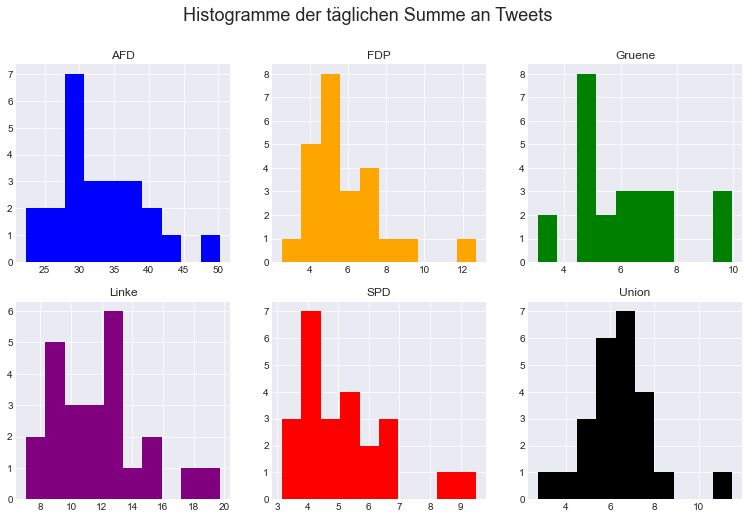

In [158]:
#datensatz = plenum_rel_piv
datensatz = twitter_rel_piv
pyplot.style.use('seaborn-darkgrid')
my_palette = ['blue', 'orange', 'green', 'purple', 'red', 'black']
#my_palette = ['blue', 'green', 'black', 'purple', 'orange', 'red']
Parteien = ['AFD', 'FDP', 'Gruene', 'Linke', 'SPD', 'Union']

fig = pyplot.figure(figsize = (13,8))
fig.suptitle('Histogramme der täglichen Summe an Tweets', fontsize = 18)

num = 0
for party, n in zip(datensatz.columns, range(1,7)):
    ax = fig.add_subplot(2,3,n)
    ax.hist(datensatz[party], color = my_palette[num])
    ax.set_title(party)
    num = num + 1

In [162]:
from scipy.stats import shapiro
dataset = plenum_rel_piv
partei = []
result = []

for party in dataset.columns:
        partei.append(party)
# normality test
        stat, p = shapiro(dataset[party])

        alpha = 0.05
        if p > alpha:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' Gaussian')
        else:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' NOT Gaussian')
            
Shapiro_Wilk_plen_df = pd.DataFrame({'Partei':partei, 'Ergebnis':result})
Shapiro_Wilk_plen_df

,Partei,Ergebnis
0,AFD,"Stats=0.983, p=0.947 Gaussian"
1,Gruene,"Stats=0.986, p=0.975 Gaussian"
2,Union,"Stats=0.884, p=0.010 NOT Gaussian"
3,Linke,"Stats=0.553, p=0.000 NOT Gaussian"
4,FDP,"Stats=0.965, p=0.546 Gaussian"
5,SPD,"Stats=0.944, p=0.197 Gaussian"


In [166]:
from numpy import mean
from numpy import std

dataset = plenum_rel_piv
partei = []
durch = []
abw = []

for party in dataset.columns:
        partei.append(party)
        durch.append('Mean: '+ str(mean(dataset[party]).round(3)))
        abw.append('Std:'+str(std(dataset[party]).round(3)))
        
twitter_data_mean_std = pd.DataFrame({'Partei': partei, 'Mean': durch, 'Std': abw})
twitter_data_mean_std

,Partei,Mean,Std
0,AFD,Mean: 5.886,Std:2.876
1,Gruene,Mean: 3.811,Std:1.941
2,Union,Mean: 3.429,Std:2.619
3,Linke,Mean: 5.339,Std:4.397
4,FDP,Mean: 2.483,Std:1.442
5,SPD,Mean: 5.137,Std:2.52


In [130]:
partei = []
durch = []
abw = []

for party in plenum_rel_piv.columns:
        partei.append(party)
        durch.append('Mean: '+ str(mean(plenum_rel_piv[party]).round(3)))
        abw.append('Std:'+str(std(plenum_rel_piv[party]).round(3)))
        
plenum_data_mean_std = pd.DataFrame({'Partei': partei, 'Mean': durch, 'Std': abw})
plenum_data_mean_std

,Partei,Mean,Std
0,AfD,Mean: 5.886,Std:2.876
1,BÜNDNIS_90/DIE_GRÜNEN,Mean: 3.811,Std:1.941
2,CDU/CSU,Mean: 3.429,Std:2.619
3,DIE_LINKE,Mean: 5.339,Std:4.397
4,FDP,Mean: 2.483,Std:1.442
5,SPD,Mean: 5.137,Std:2.52


### Spearman’s Rank Correlation


*   Observations in each sample are independent and identically distributed (iid).
*   Observations in each sample can be ranked.

Für den Vergleich von Twitter und Plenardaten werden zwei verschiedene Zeiteinheiten verwendet und die Zeiträume wurden weitgehend aneinander angeglichen - eine genaue Übereinstimmung gibt es nicht, ist jedoch auch nicht sinnvoll weil Themen im Plenum keinen tagesaktuellen Bezug haben:

* Twitter - Wochen
* Plenum - Tage

Bei den Plenardaten müssen außerdem sechs Tage entfernt werden an denen es keine OFFENSE Tweets gab - andernfalls würden nicht die gleichen Tage mit OFFENSE Tweets durch alle Tweets geteilt.

In [131]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
#-> Es können technsich beide verwendet werden - nur unten Fkt. anpassen 
# Aber Spearman ist sinnvoller weil Annahme der Normalverteilung für piv_date_str nicht haltbar ist

partei = []
partei_plen = []
dataset = []
result = []

for party in twitter_dic['piv_month'].columns:
    for party_plen in plenum_dic['piv_date_str'].columns:
        partei.append(party)
        partei_plen.append(party_plen)
# normality test
        stat, p = spearmanr(twitter_rel_piv[party], plenum_rel_piv[party_plen])

        if p > 0.05:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + ' INDEPENDENT')
        else:
            result.append('Stats=%.3f, p=%.3f' % (stat, p) + 'Probably dependent')
            
Corr_parties_df = pd.DataFrame({'Partei':partei, 'Partei_Plenum':partei_plen, 'Ergebnis':result})
Corr_parties_piv =  pd.pivot_table(Corr_parties_df, values='Ergebnis', index=['Partei_Plenum'], columns=['Partei'], aggfunc=max) 
Corr_parties_piv
# -> Die Zurufe die im Parlament an den jeweiligen Sitzungstagen erfolgen sind unabbhängig von den Tweets innerhalb einer Woche 

Partei,AFD,FDP,Gruene,Linke,SPD,Union
Partei_Plenum,,,,,,
AfD,"Stats=0.454, p=0.026Probably dependent","Stats=0.091, p=0.671 INDEPENDENT","Stats=0.464, p=0.022Probably dependent","Stats=0.260, p=0.219 INDEPENDENT","Stats=0.158, p=0.460 INDEPENDENT","Stats=0.122, p=0.569 INDEPENDENT"
BÜNDNIS_90/DIE_GRÜNEN,"Stats=0.331, p=0.115 INDEPENDENT","Stats=0.334, p=0.110 INDEPENDENT","Stats=0.414, p=0.044Probably dependent","Stats=0.218, p=0.306 INDEPENDENT","Stats=0.329, p=0.117 INDEPENDENT","Stats=-0.066, p=0.759 INDEPENDENT"
CDU/CSU,"Stats=-0.206, p=0.335 INDEPENDENT","Stats=0.328, p=0.117 INDEPENDENT","Stats=0.002, p=0.992 INDEPENDENT","Stats=0.113, p=0.600 INDEPENDENT","Stats=0.338, p=0.106 INDEPENDENT","Stats=0.101, p=0.639 INDEPENDENT"
DIE_LINKE,"Stats=-0.170, p=0.428 INDEPENDENT","Stats=0.089, p=0.680 INDEPENDENT","Stats=0.053, p=0.806 INDEPENDENT","Stats=-0.047, p=0.828 INDEPENDENT","Stats=-0.039, p=0.856 INDEPENDENT","Stats=-0.297, p=0.158 INDEPENDENT"
FDP,"Stats=-0.055, p=0.799 INDEPENDENT","Stats=-0.243, p=0.253 INDEPENDENT","Stats=0.107, p=0.619 INDEPENDENT","Stats=-0.158, p=0.460 INDEPENDENT","Stats=0.037, p=0.862 INDEPENDENT","Stats=0.132, p=0.538 INDEPENDENT"
SPD,"Stats=0.353, p=0.091 INDEPENDENT","Stats=0.259, p=0.221 INDEPENDENT","Stats=0.189, p=0.376 INDEPENDENT","Stats=0.339, p=0.105 INDEPENDENT","Stats=0.083, p=0.698 INDEPENDENT","Stats=0.216, p=0.310 INDEPENDENT"


In [142]:
from scipy.stats import mannwhitneyu

plenum_rel_piv.columns = ['AFD', 'Gruene', 'Union', 'Linke', 'FDP', 'SPD']

partei = []
partei_plen = []
dataset = []
result = []   

for party in plenum_rel_piv.columns:
    partei.append(party)
# normality test
    stat, p = mannwhitneyu(twitter_rel_piv[party], plenum_rel_piv[party])
    if p > 0.05 :    # p/2 für Einseitigen t-Test
        result.append('stat=%.3f, p=%.3f' % (stat, p) + ' Gleich offensiv oder mehr im Plenum')
    else:
        result.append('stat=%.3f, p=%.3f' % (stat, p) + ' WENIGER OFFENSIV im Plenum')
                        
H06_df = pd.DataFrame({'Partei':partei, 'Ergebnis':result})
#H06_df

,Partei,Ergebnis
0,AFD,"stat=0.000, p=0.000 WENIGER OFFENSIV im Plenum"
1,Gruene,"stat=110.500, p=0.000 WENIGER OFFENSIV im Plenum"
2,Union,"stat=82.000, p=0.000 WENIGER OFFENSIV im Plenum"
3,Linke,"stat=26.000, p=0.000 WENIGER OFFENSIV im Plenum"
4,FDP,"stat=42.000, p=0.000 WENIGER OFFENSIV im Plenum"
5,SPD,"stat=287.000, p=0.496 Gleich offensiv oder meh..."


In [143]:
import numpy as np
import pingouin as pg
from pingouin import ttest
#https://pingouin-stats.org/generated/pingouin.mwu.html
#https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

for party in plenum_rel_piv.columns:
# normality test
    print(party)
    print(mannwhitneyu(twitter_rel_piv[party], plenum_rel_piv[party]))
    print(pg.mwu(plenum_rel_piv[party],twitter_rel_piv[party]))
    #print(pg.mwu(plenum_rel_piv[party],twitter_rel_piv[party], tail = 'less'))

AFD
MannwhitneyuResult(statistic=0.0, pvalue=1.5303323340213934e-09)
     U-val       tail         p-val  RBC  CLES
MWU    0.0  two-sided  3.060665e-09  1.0   1.0
Gruene
MannwhitneyuResult(statistic=110.5, pvalue=0.00013113257752894592)
     U-val       tail     p-val       RBC      CLES
MWU  110.5  two-sided  0.000262  0.616319  0.807292
Union
MannwhitneyuResult(statistic=82.0, pvalue=1.1303456860005288e-05)
     U-val       tail     p-val       RBC      CLES
MWU   82.0  two-sided  0.000023  0.715278  0.857639
Linke
MannwhitneyuResult(statistic=26.0, pvalue=3.483129805213429e-08)
     U-val       tail         p-val       RBC      CLES
MWU   26.0  two-sided  6.966260e-08  0.909722  0.954861
FDP
MannwhitneyuResult(statistic=42.0, pvalue=2.0730485994616114e-07)
     U-val       tail         p-val       RBC      CLES
MWU   42.0  two-sided  4.146097e-07  0.854167  0.927083
SPD
MannwhitneyuResult(statistic=287.0, pvalue=0.4958869356538494)
     U-val       tail     p-val       RBC      CLES

# H07: Der Anteil von OFFENSE-Zurufen vor Corona ist genauso groß oder kleiner als währenddessen.

In [165]:
import pickle, gensim, numpy as np
import pandas as pd 

#df_kom = mdp_partei_emo
PICKLE_FOLDER_PATH = '/home/lisa/Darmstadt/Master Arbeit/06_Analyse/Plenum/'
#pickle.dump(df_kom, open(PICKLE_FOLDER_PATH + 'Plenum_Kom_all_Sent', "wb" ))

df_kom = pickle.load(open(PICKLE_FOLDER_PATH + 'Plenum_Kom_all_Sent', "rb" ))

In [166]:
import pandas as pd
time = ['Monat', 'Woche', 'date_str']
cat = ['', 'OFFENSE', 'OTHER']
plenum_dic = {}


for c in cat: 
    if c == '':
        sent_df = df_kom
    else:
        sent_df = df_kom.loc[df_kom['predict'] == c]
    for t in time: 
        piv = pd.pivot_table(sent_df, index = [t], columns = ['Partei'], aggfunc = np.count_nonzero)['Beschreibung1'].fillna(0)
        
        plenum_dic['piv_'+t+c] =  piv       
            
for woche in ['17-w43', '18-w03', '18-w36', '19-w29', '19-w36']:
    plenum_dic['piv_Woche'] = plenum_dic['piv_Woche'].loc[plenum_dic['piv_Woche'].index != woche]
    plenum_dic['piv_WocheOFFENSE'] = plenum_dic['piv_WocheOFFENSE'].loc[plenum_dic['piv_WocheOFFENSE'].index != woche]

# Normiere OFFENSE Tweets
plenum_dic['piv_Woche_rel'] = (plenum_dic['piv_WocheOFFENSE'] / plenum_dic['piv_Woche'])*100
    
plenum_dic.keys()

dict_keys(['piv_Monat', 'piv_Woche', 'piv_date_str', 'piv_MonatOFFENSE', 'piv_WocheOFFENSE', 'piv_date_strOFFENSE', 'piv_MonatOTHER', 'piv_WocheOTHER', 'piv_date_strOTHER', 'piv_Woche_rel'])

In [167]:
# Lösche Datum für das es keine OFFENSE Zurufe gab
plenum_dic['piv_date_str'] = plenum_dic['piv_date_str'].loc[plenum_dic['piv_date_str'].index != '2020-01-15']

# Nur Lockdown - wären gerade sechs Beobachtungen
#piv_Corona_plen_rel = (plenum_dic['piv_date_strOFFENSE'][146:152]/plenum_dic['piv_date_str'][151:157])*100
#piv_before_Corona_plen_rel = (plenum_dic['piv_date_strOFFENSE'][141:147]/plenum_dic['piv_date_str'][146:152])*100

# Ab Lockdown bis zur Sommerpause - 18 Beobachtungen
piv_Corona_plen_rel = (plenum_dic['piv_date_strOFFENSE'][146:]/plenum_dic['piv_date_str'][151:])*100
piv_before_Corona_plen_rel = (plenum_dic['piv_date_strOFFENSE'][128:146]/plenum_dic['piv_date_str'][133:151])*100

In [169]:
from scipy.stats import wilcoxon

import numpy as np
import pingouin as pg
from pingouin import ttest
#https://pingouin-stats.org/generated/pingouin.mwu.html
#https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

for party in piv_Corona_plen_rel.columns:
# normality test
        print(party)
        print(wilcoxon(piv_before_Corona_plen_rel[party], piv_Corona_plen_rel[party]))
        print(pg.wilcoxon(piv_before_Corona_plen_rel[party], piv_Corona_plen_rel[party]))

AfD
WilcoxonResult(statistic=27.0, pvalue=0.00896453857421875)
          W-val       tail     p-val       RBC     CLES
Wilcoxon   27.0  two-sided  0.008965  0.684211  0.79784
BÜNDNIS_90/DIE_GRÜNEN
WilcoxonResult(statistic=51.0, pvalue=0.6092350686367863)
          W-val       tail     p-val   RBC      CLES
Wilcoxon   51.0  two-sided  0.629261  0.15  0.569444
CDU/CSU
WilcoxonResult(statistic=76.0, pvalue=0.7018814086914062)
          W-val       tail     p-val       RBC      CLES
Wilcoxon   76.0  two-sided  0.701881  0.111111  0.544753
DIE_LINKE
WilcoxonResult(statistic=69.0, pvalue=0.7225627705707576)
          W-val       tail     p-val       RBC      CLES
Wilcoxon   69.0  two-sided  0.740367 -0.098039  0.486111
FDP
WilcoxonResult(statistic=48.0, pvalue=0.3010541816225988)
          W-val       tail   p-val       RBC      CLES
Wilcoxon   48.0  two-sided  0.3133 -0.294118  0.458333
SPD
WilcoxonResult(statistic=44.0, pvalue=0.12392922503869737)
          W-val       tail     p-val      

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
